In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

11490434/11490434 [==============================] - 0s 0us/step


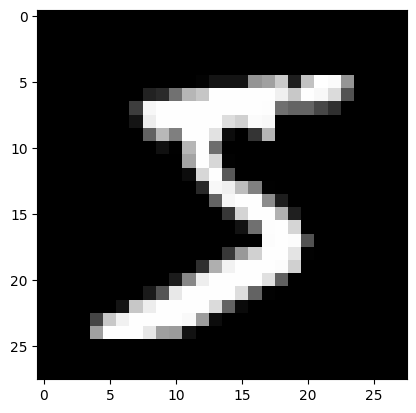

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [15]:
train_steps = 1000
learning_rate = 0.1

hidden_layer_size = 128

# Initialize weights and biases for the hidden layer
hidden_weights = tf.Variable(tf.random.uniform([784, hidden_layer_size], minval=-0.1, maxval=0.1))
hidden_biases = tf.Variable(tf.random.uniform([hidden_layer_size], minval=-0.1, maxval=0.1))


W = tf.Variable(tf.random.uniform([hidden_layer_size, 10], minval=-0.09, maxval=0.09))
b = tf.Variable(tf.random.uniform([10], minval=-0.09, maxval=0.09))

In [16]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:

        hidden_output = tf.nn.relu(tf.matmul(img_batch, hidden_weights) + hidden_biases)
        logits = tf.matmul(hidden_output, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))

    grads = tape.gradient(xent, [hidden_weights, hidden_biases, W, b])
    hidden_weights.assign_sub(learning_rate * grads[0])
    hidden_biases.assign_sub(learning_rate * grads[1])
    W.assign_sub(learning_rate * grads[2])
    b.assign_sub(learning_rate * grads[3])

    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3065881729125977 Accuracy: 0.109375
Loss: 0.5045995712280273 Accuracy: 0.859375
Loss: 0.4787636995315552 Accuracy: 0.8515625
Loss: 0.2918599843978882 Accuracy: 0.9140625
Starting new epoch...
Loss: 0.38574838638305664 Accuracy: 0.875
Loss: 0.28934019804000854 Accuracy: 0.9140625
Loss: 0.2709353268146515 Accuracy: 0.921875
Loss: 0.4456024169921875 Accuracy: 0.8828125
Loss: 0.27608782052993774 Accuracy: 0.90625
Starting new epoch...
Loss: 0.18951547145843506 Accuracy: 0.9453125


In [17]:
hidden_test_output = tf.nn.relu(tf.matmul(data.test_data, hidden_weights) + hidden_biases)
test_logits = tf.matmul(hidden_test_output, W) + b
test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)


acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9334, shape=(), dtype=float32)
